## Import Libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## Connect to local SQLite database

In [2]:

conn = sqlite3.connect('superstore_sales.db')

## Load CSV to database

In [3]:
df = pd.read_csv('Superstore_Dataset_Preprocessed.csv')
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,CA-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,CA-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [4]:
df.columns = ['Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit']

In [5]:
df.to_sql('superstore_sales', conn, if_exists='replace', index=False)

9993

In [6]:
query = "SELECT * FROM superstore_sales LIMIT 5;"
result = pd.read_sql_query(query, conn)
print(result)

         Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0  CA-2019-103800  2019-01-03  2019-01-07  Standard Class    DP-13000   
1  CA-2019-112326  2019-01-04  2019-01-08  Standard Class    PO-19195   
2  CA-2019-112326  2019-01-04  2019-01-08  Standard Class    PO-19195   
3  CA-2019-112326  2019-01-04  2019-01-08  Standard Class    PO-19195   
4  CA-2019-141817  2019-01-05  2019-01-12  Standard Class    MB-18085   

   Customer_Name      Segment        Country          City         State  \
0  Darren Powers     Consumer  United States       Houston         Texas   
1  Phillina Ober  Home Office  United States    Naperville      Illinois   
2  Phillina Ober  Home Office  United States    Naperville      Illinois   
3  Phillina Ober  Home Office  United States    Naperville      Illinois   
4     Mick Brown     Consumer  United States  Philadelphia  Pennsylvania   

   Postal_Code   Region       Product_ID         Category Sub_Category  \
0        77095  Central  OFF-P

In [7]:
query_1 = "SELECT COUNT(*) AS total_records FROM superstore_sales;"
result_1 = pd.read_sql_query(query_1, conn)
print(result_1)

   total_records
0           9993


## Average Sales Per Order

In [8]:
query_2 = "SELECT AVG(Sales) AS average_sales FROM superstore_sales;"
result_2 = pd.read_sql_query(query_2, conn)
print(result_2)

   average_sales
0     229.852846


## Total Sales By Category

In [9]:
query_3 = "SELECT Category, SUM(Sales) AS total_sales FROM superstore_sales GROUP BY Category;"
result_3 = pd.read_sql_query(query_3, conn)
result_3

,Category,total_sales
0,Furniture,741718.4233
1,Office Supplies,719047.0320
2,Technology,836154.0330


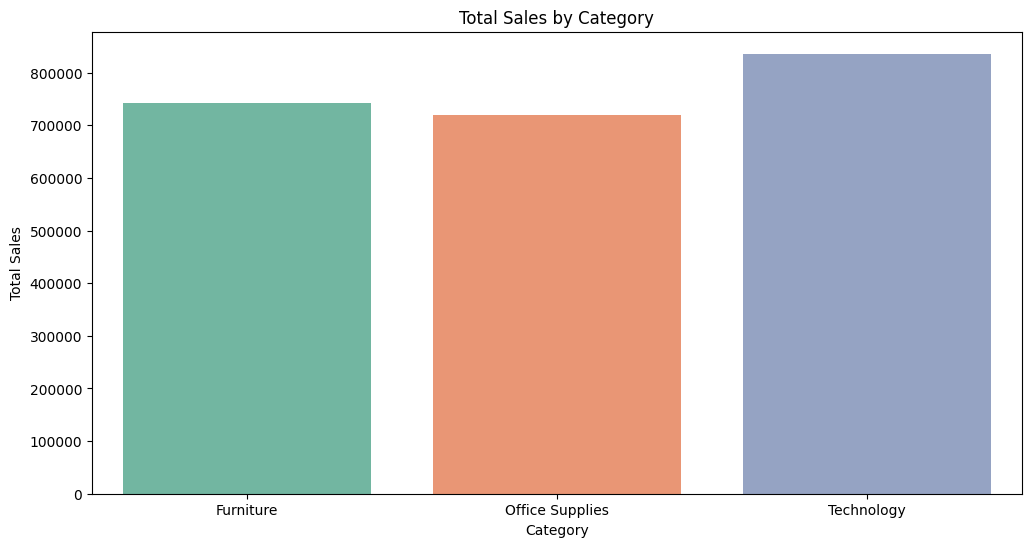

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_3, x='Category', y='total_sales', hue='Category', palette='Set2')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

## Total Profit By Region

In [11]:
query_4 = "SELECT Region, SUM(Profit) AS total_profit FROM superstore_sales GROUP BY Region;"
result_4 = pd.read_sql_query(query_4, conn) 
result_4

,Region,total_profit
0,Central,39706.3625
1,East,91534.8388
2,South,46749.4303
3,West,108418.4489


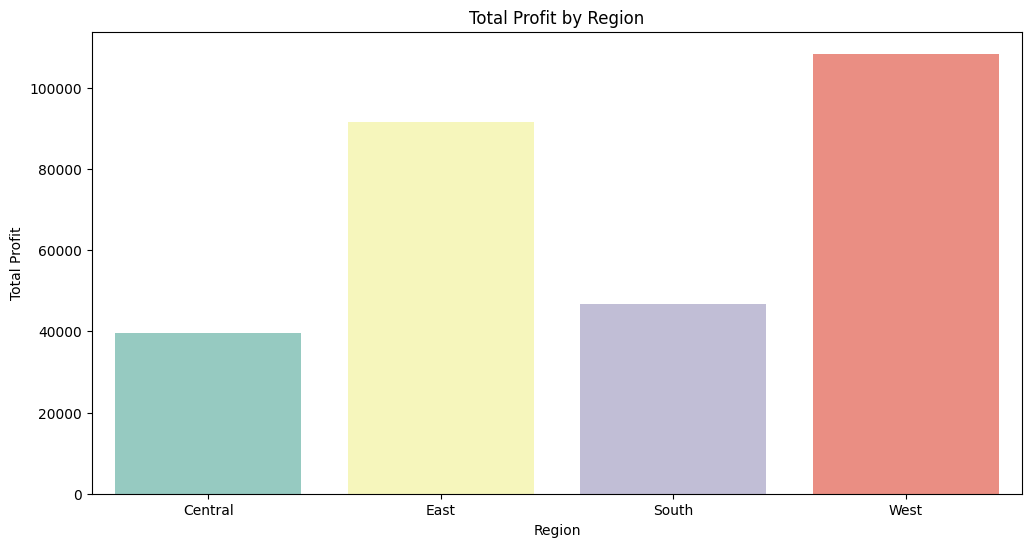

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_4, x='Region', y='total_profit', hue='Region', palette='Set3')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()


## Average Discount By Sub-Category

In [13]:
query_5 = "SELECT Sub_Category, AVG(Discount) AS average_discount FROM superstore_sales GROUP BY Sub_Category;"
result_5 = pd.read_sql_query(query_5, conn)
result_5

,Sub_Category,average_discount
0,Accessories,0.078452
1,Appliances,0.166524
2,Art,0.074874
3,Binders,0.372292
4,Bookcases,0.211140
5,Chairs,0.169968
6,Copiers,0.161765
7,Envelopes,0.080315
8,Fasteners,0.082028
9,Furnishings,0.138349


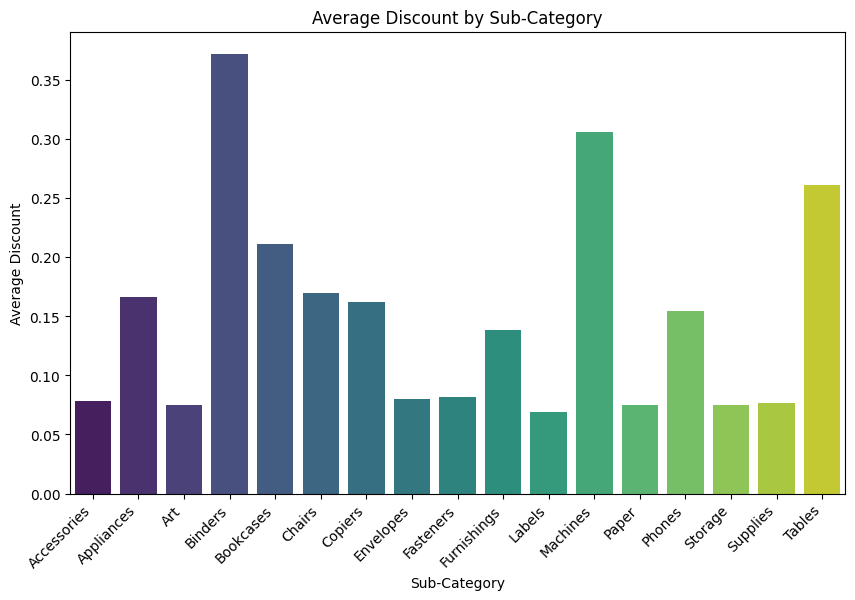

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_5, x='Sub_Category', y='average_discount', palette='viridis')
plt.title('Average Discount by Sub-Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Discount')
plt.show()

## Total Sales By State

In [15]:
query_6 = "SELECT State, SUM(Sales) AS total_sales FROM superstore_sales WHERE Category = 'Technology' GROUP BY State;"
result_6 = pd.read_sql_query(query_6, conn)
result_6

,State,total_sales
0,Alabama,8969.080
1,Arizona,11750.885
2,Arkansas,3925.250
3,California,159271.082
4,Colorado,10966.329
5,Connecticut,2791.030
6,Delaware,14562.220
7,District of Columbia,1379.920
8,Florida,46968.036
9,Georgia,14058.550


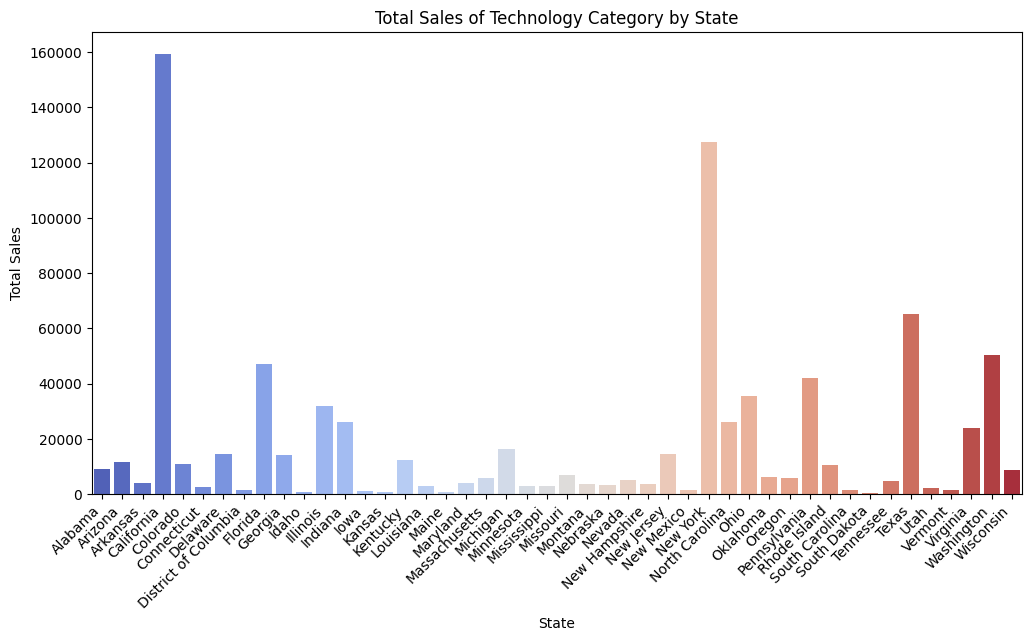

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_6, x='State', y='total_sales', palette='coolwarm')
plt.title('Total Sales of Technology Category by State')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.show()

## Top 10 Customers By Profit

In [17]:
query_7 = "SELECT Customer_ID, SUM(Profit) AS total_profit FROM superstore_sales GROUP BY Customer_ID ORDER BY total_profit DESC LIMIT 10;"
result_7 = pd.read_sql_query(query_7, conn)
result_7

,Customer_ID,total_profit
0,TC-20980,8981.3239
1,RB-19360,6976.0959
2,SC-20095,5757.4119
3,HL-15040,5622.4292
4,AB-10105,5444.8055
5,TA-21385,4703.7883
6,CM-12385,3899.8904
7,KD-16495,3038.6254
8,AR-10540,2884.6208
9,DR-12940,2869.0760


## Average Profit By Segment

In [18]:
query_8 = """SELECT Segment,
AVG(Profit) AS average_profit
FROM superstore_sales
GROUP BY Segment;""" 
result_8 = pd.read_sql_query(query_8, conn)
result_8

,Segment,average_profit
0,Consumer,25.836873
1,Corporate,30.456667
2,Home Office,33.844409


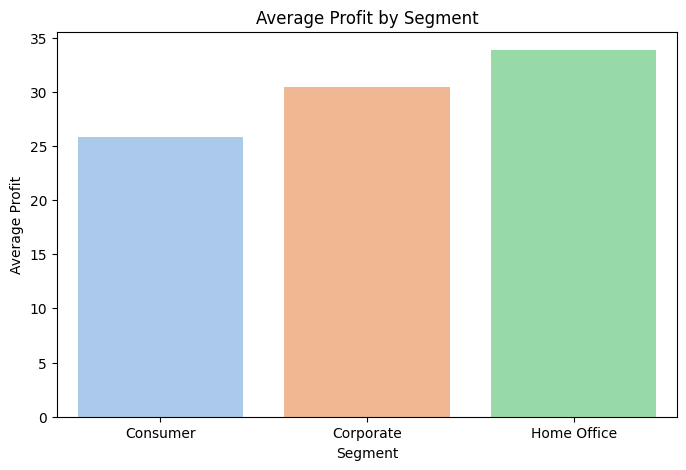

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=result_8, x='Segment', y='average_profit', palette='pastel')
plt.title('Average Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Profit')
plt.show()

## Monthly Revenue Trend By Year

In [20]:
query_9 = """SELECT 
    strftime('%Y', Order_Date) AS Year,
    strftime('%m', Order_Date) AS MonthNum,
    CASE strftime('%m', Order_Date)
        WHEN '01' THEN 'January'
        WHEN '02' THEN 'February'
        WHEN '03' THEN 'March'
        WHEN '04' THEN 'April'
        WHEN '05' THEN 'May'
        WHEN '06' THEN 'June'
        WHEN '07' THEN 'July'
        WHEN '08' THEN 'August'
        WHEN '09' THEN 'September'
        WHEN '10' THEN 'October'
        WHEN '11' THEN 'November'
        WHEN '12' THEN 'December'
    END AS MonthName,
    COUNT(DISTINCT Order_ID) AS Orders,
    SUM(Sales) AS Revenue,
    SUM(Profit) AS Profit
FROM superstore_sales
GROUP BY strftime('%Y', Order_Date), strftime('%m', Order_Date)
ORDER BY MonthNum"""
result_9 = pd.read_sql_query(query_9, conn)
result_9 

,Year,MonthNum,MonthName,Orders,Revenue,Profit
0,2019,01,January,32,14236.8950,2450.1907
1,2020,01,January,29,18174.0756,-3281.0070
2,2021,01,January,50,18704.4610,2888.0395
3,2022,01,January,69,43971.3740,7140.4391
4,2019,02,February,28,4519.8920,862.3084
5,2020,02,February,41,13593.5854,2826.5690
6,2021,02,February,43,22816.8450,4941.3633
7,2022,02,February,53,20301.1334,1613.8720
8,2019,03,March,71,55691.0090,498.7299
9,2020,03,March,74,37084.0776,9719.3796


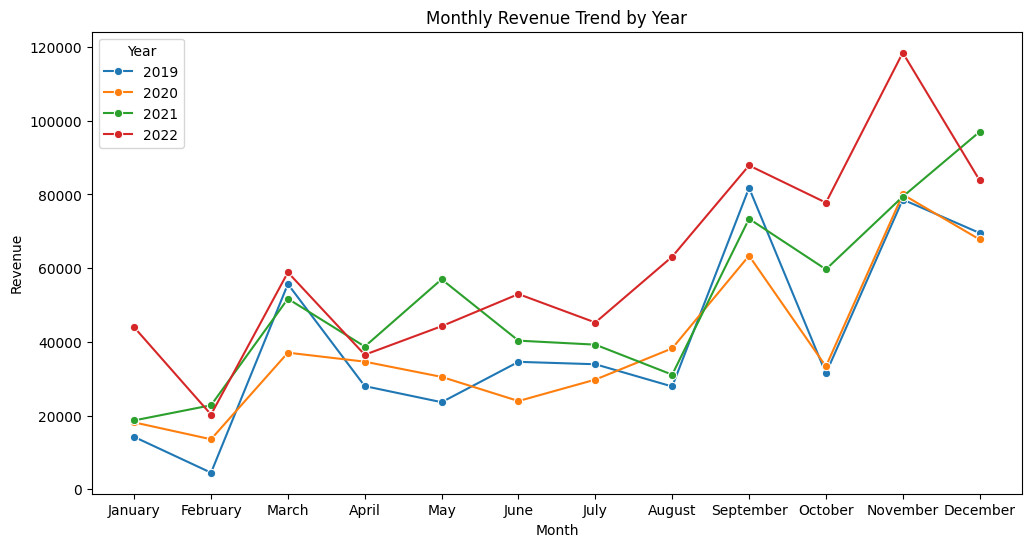

In [21]:
plt.figure(figsize=(12,6))
sns.lineplot(data=result_9, x='MonthName', y='Revenue', hue='Year', marker='o')
plt.title('Monthly Revenue Trend by Year')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

## Top 10 Products By Revenue

In [22]:
query_10 = """SELECT Product_Name,
Category,
Sub_Category,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
SUM(Quantity) AS total_quantity_sold,
COUNT(DISTINCT Order_ID) AS number_of_orders
FROM superstore_sales
GROUP BY Product_Name, Category, Sub_Category
ORDER BY total_sales DESC
LIMIT 10;"""
result_10 = pd.read_sql_query(query_10, conn)
result_10

,Product_Name,Category,Sub_Category,total_sales,total_profit,total_quantity_sold,number_of_orders
0,Canon imageCLASS 2200 Advanced Copier,Technology,Copiers,61599.824,2.519993e+04,20,5
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,Binders,27453.384,7.753039e+03,31,10
2,Cisco TelePresence System EX90 Videoconferenci...,Technology,Machines,22638.480,-1.811078e+03,6,1
3,HON 5400 Series Task Chairs for Big and Tall,Furniture,Chairs,21870.576,1.136868e-13,39,8
4,GBC DocuBind TL300 Electric Binding System,Office Supplies,Binders,19823.479,2.233505e+03,37,11
5,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,Binders,19024.500,7.609800e+02,48,9
6,Hewlett Packard LaserJet 3310 Copier,Technology,Copiers,18839.686,6.983884e+03,38,8
7,HP Designjet T520 Inkjet Large Format Printer ...,Technology,Machines,18374.895,4.094977e+03,12,3
8,GBC DocuBind P400 Electric Binding System,Office Supplies,Binders,17965.068,-1.878166e+03,27,6
9,High Speed Automatic Electric Letter Opener,Office Supplies,Supplies,17030.312,-2.620048e+02,11,3


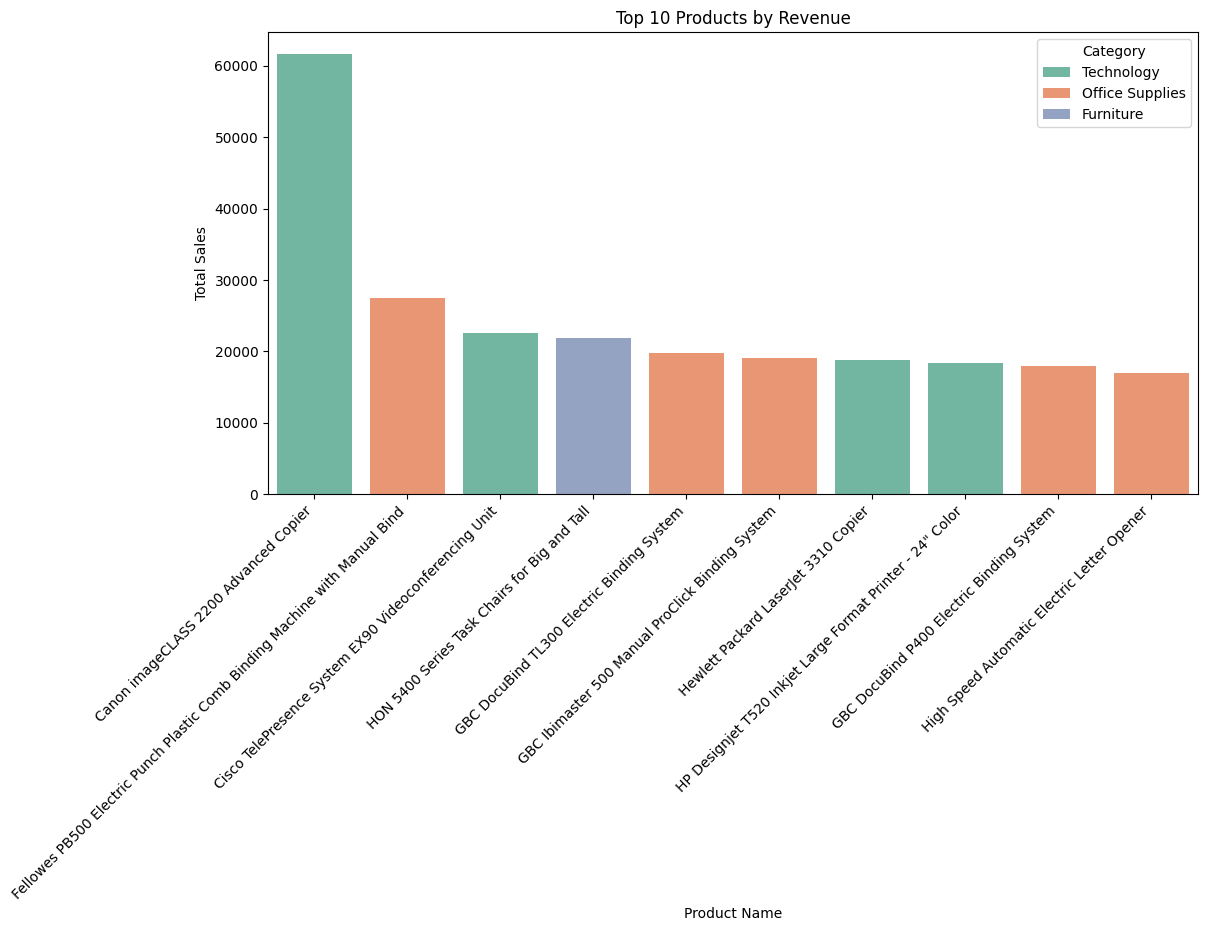

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_10, x='Product_Name', y='total_sales', hue='Category', palette='Set2')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.show()

## Category Performance By Profit Margin

In [24]:
query_11 = """SELECT Category, COUNT(DISTINCT Order_ID) AS number_of_orders,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
ROUND(SUM(Profit)/SUM(Sales)*100,2) AS profit_margin_percentage,
SUM(Quantity) AS total_quantity_sold,
AVG(Discount) * 100 AS average_discount
FROM superstore_sales
GROUP BY Category
ORDER BY total_sales DESC;"""
result_11 = pd.read_sql_query(query_11, conn)
result_11

,Category,number_of_orders,total_sales,total_profit,profit_margin_percentage,total_quantity_sold,average_discount
0,Technology,1544,836154.0330,145454.9481,17.40,6939,13.232269
1,Furniture,1764,741718.4233,18463.3316,2.49,8026,17.386321
2,Office Supplies,3742,719047.0320,122490.8008,17.04,22906,15.728510


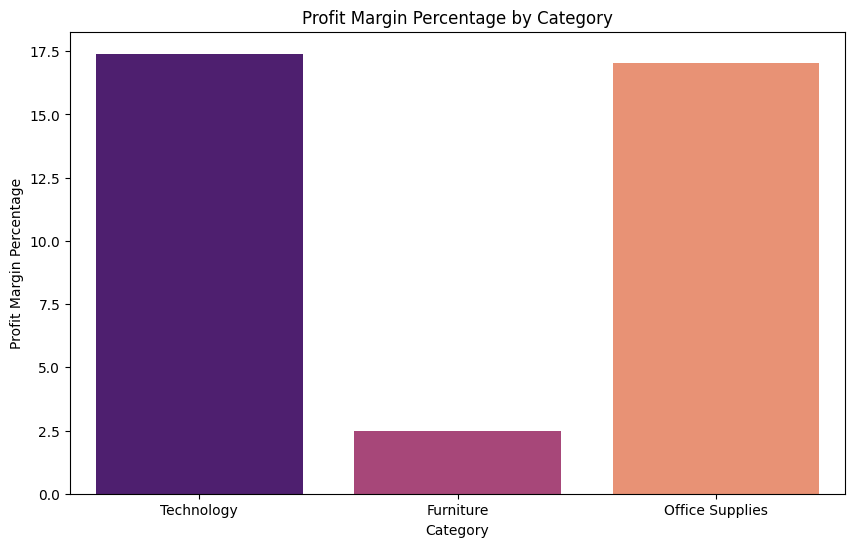

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_11, x='Category', y='profit_margin_percentage', palette='magma')
plt.title('Profit Margin Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin Percentage')
plt.show()

## Profit Margin By Category and Sub-Category 

In [26]:
query_12 = """SELECT Category,
Sub_Category,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
ROUND(SUM(Profit)/SUM(Sales)*100,2) AS profit_margin_percentage,
SUM(Quantity) AS total_quantity_sold
FROM superstore_sales
GROUP BY Category, Sub_Category
ORDER BY total_sales DESC;"""
result_12 = pd.read_sql_query(query_12, conn)
result_12

,Category,Sub_Category,total_sales,total_profit,profit_margin_percentage,total_quantity_sold
0,Technology,Phones,330007.0540,44515.7306,13.49,3289
1,Furniture,Chairs,328167.7310,26602.2251,8.11,2354
2,Office Supplies,Storage,223843.6080,21278.8264,9.51,3158
3,Furniture,Tables,206965.5320,-17725.4811,-8.56,1241
4,Office Supplies,Binders,203412.7330,30221.7633,14.86,5974
5,Technology,Machines,189238.6310,3384.7569,1.79,440
6,Technology,Accessories,167380.3180,41936.6357,25.05,2976
7,Technology,Copiers,149528.0300,55617.8249,37.20,234
8,Furniture,Bookcases,114879.9963,-3472.5560,-3.02,868
9,Office Supplies,Appliances,107532.1610,18138.0054,16.87,1729


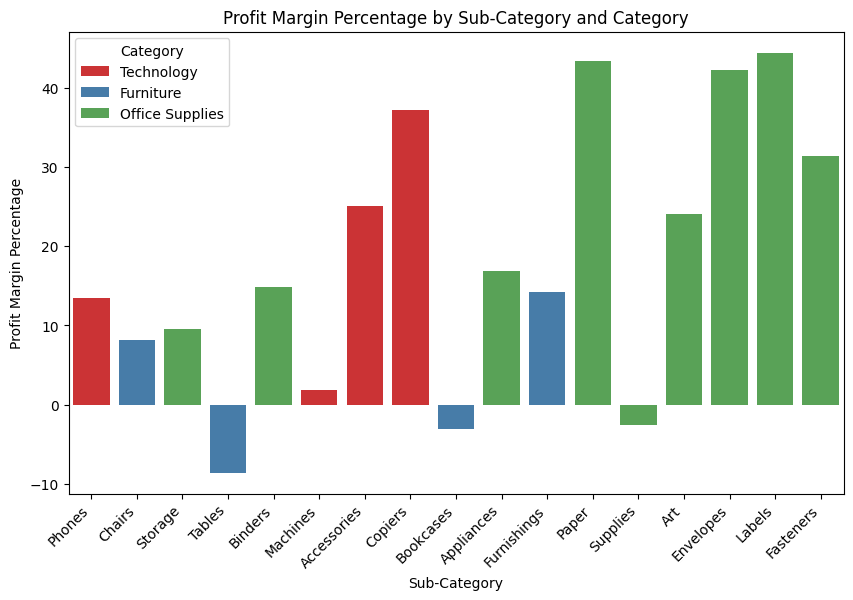

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_12, x='Sub_Category', y='profit_margin_percentage', hue='Category', palette='Set1')
plt.title('Profit Margin Percentage by Sub-Category and Category')
plt.xlabel('Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit Margin Percentage')
plt.show()

## Customer Segment Analysis

In [28]:
query_13 = """SELECT Segment,
COUNT(DISTINCT Customer_ID) AS number_of_customers,
COUNT(DISTINCT Order_ID) AS number_of_orders,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
ROUND(SUM(Sales)/COUNT(DISTINCT Customer_ID),2) AS revenue_per_customer,
ROUND(SUM(Sales)/COUNT(DISTINCT Order_ID),2) AS average_order_value
FROM superstore_sales
GROUP BY Segment
ORDER BY total_sales DESC;"""
result_13 = pd.read_sql_query(query_13, conn)
result_13

,Segment,number_of_customers,number_of_orders,total_sales,total_profit,revenue_per_customer,average_order_value
0,Consumer,409,2586,1.161401e+06,134119.2092,2839.61,449.11
1,Corporate,236,1514,7.061464e+05,91979.1340,2992.15,466.41
2,Home Office,148,909,4.293718e+05,60310.7373,2901.16,472.36


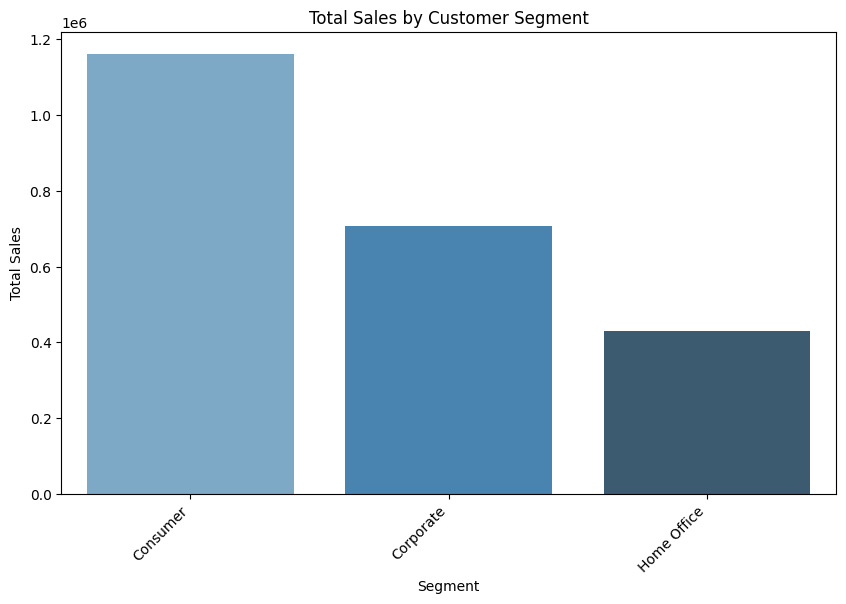

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_13, x='Segment', y='total_sales', palette='Blues_d')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Segment')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.show()

## Regional Performance

In [30]:
query_14 = """SELECT Region,
COUNT(DISTINCT State) AS number_of_states,
COUNT(DISTINCT Customer_ID) AS number_of_customers,
COUNT(DISTINCT Order_ID) AS number_of_orders,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
ROUND(SUM(Profit)/SUM(Sales)*100,2) AS profit_margin_percentage
FROM superstore_sales
GROUP BY Region
ORDER BY total_sales DESC;"""
result_14 = pd.read_sql_query(query_14, conn)
result_14

,Region,number_of_states,number_of_customers,number_of_orders,total_sales,total_profit,profit_margin_percentage
0,West,11,686,1611,725457.8245,108418.4489,14.94
1,East,14,674,1401,678499.8680,91534.8388,13.49
2,Central,13,629,1175,501239.8908,39706.3625,7.92
3,South,11,512,822,391721.9050,46749.4303,11.93


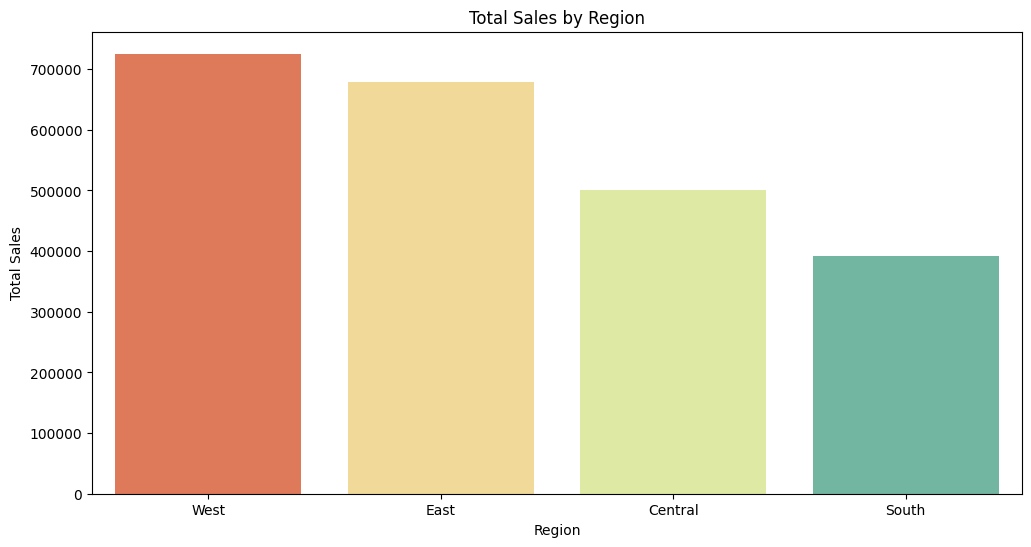

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_14, x='Region', y='total_sales', palette='Spectral')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

## Top 10 States By Revenue

In [32]:
query_15 = """SELECT State, Region,
COUNT(DISTINCT Customer_ID) AS number_of_customers,
SUM(Sales) AS revenue,
SUM(Profit) AS profit
FROM superstore_sales
GROUP BY State, Region
ORDER BY revenue DESC LIMIT 10;"""
result_15 = pd.read_sql_query(query_15, conn)
result_15

,State,Region,number_of_customers,revenue,profit
0,California,West,577,457687.6315,76381.3871
1,New York,East,415,310876.2710,74038.5486
2,Texas,Central,370,170188.0458,-25729.3563
3,Washington,West,224,138641.2700,33402.6517
4,Pennsylvania,East,257,116511.9140,-15559.9603
5,Florida,South,181,89473.7080,-3399.3017
6,Illinois,Central,237,80166.1010,-12607.8870
7,Ohio,East,202,77976.7640,-16959.3178
8,Michigan,Central,106,76269.6140,24463.1876
9,Virginia,South,107,70636.7200,18597.9504


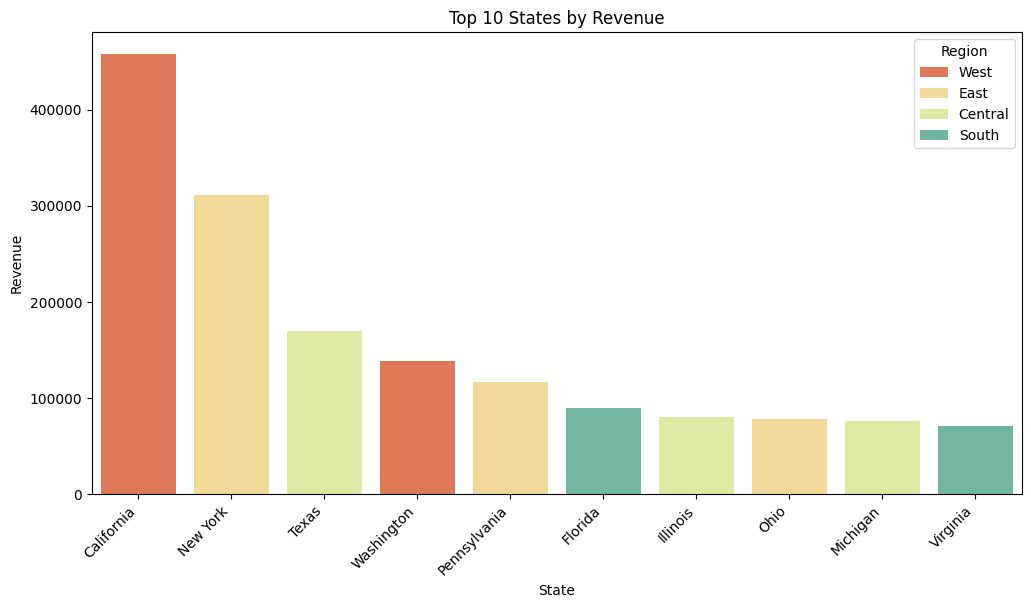

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_15, x='State', y='revenue', palette='Spectral',hue='Region')
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.show()

## Top 10 Cities By Revenue

In [34]:
query_16 = """SELECT City, State,
SUM(Sales) AS revenue,
SUM(Profit) AS profit,
COUNT(DISTINCT Order_ID) AS number_of_orders
FROM superstore_sales
GROUP BY City, State
ORDER BY revenue DESC LIMIT 10;"""
result_16 = pd.read_sql_query(query_16, conn)
result_16

,City,State,revenue,profit,number_of_orders
0,New York City,New York,256368.1610,62036.9837,450
1,Los Angeles,California,175851.3410,30440.7579,384
2,Seattle,Washington,119540.7420,29156.0967,212
3,San Francisco,California,112669.0920,17507.3854,265
4,Philadelphia,Pennsylvania,109077.0130,-13837.7674,265
5,Houston,Texas,64504.7604,-10153.5485,188
6,Chicago,Illinois,48539.5410,-6654.5688,171
7,San Diego,California,47521.0290,6377.1960,88
8,Detroit,Michigan,42446.9440,13181.7908,53
9,Jacksonville,Florida,39133.3280,-2445.6608,38


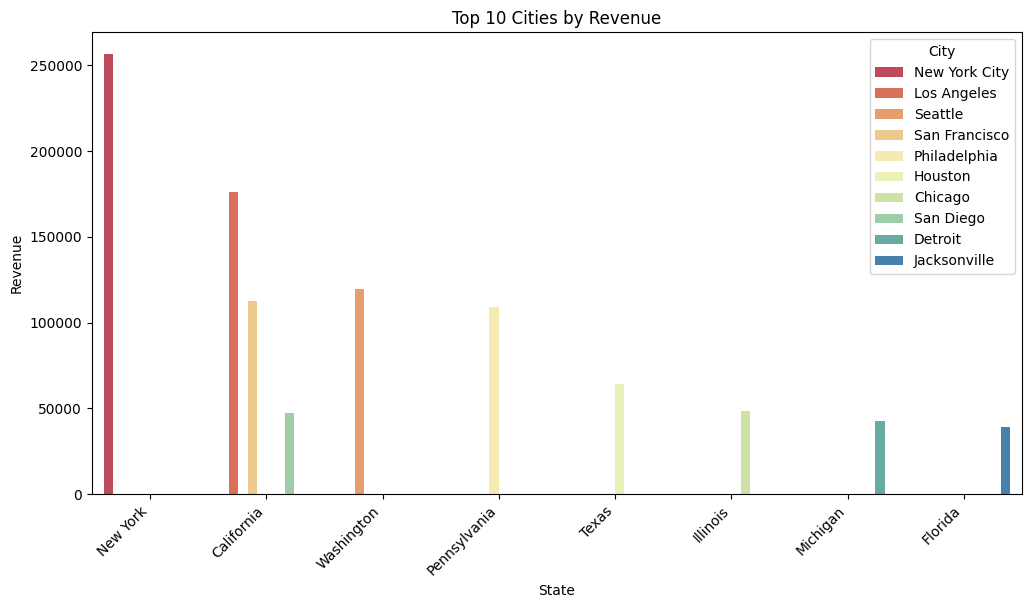

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(data=result_16, x='State', y='revenue', palette='Spectral',hue='City')
plt.title('Top 10 Cities by Revenue')
plt.xlabel('State')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Revenue')
plt.show()

<Figure size 1000x600 with 0 Axes>

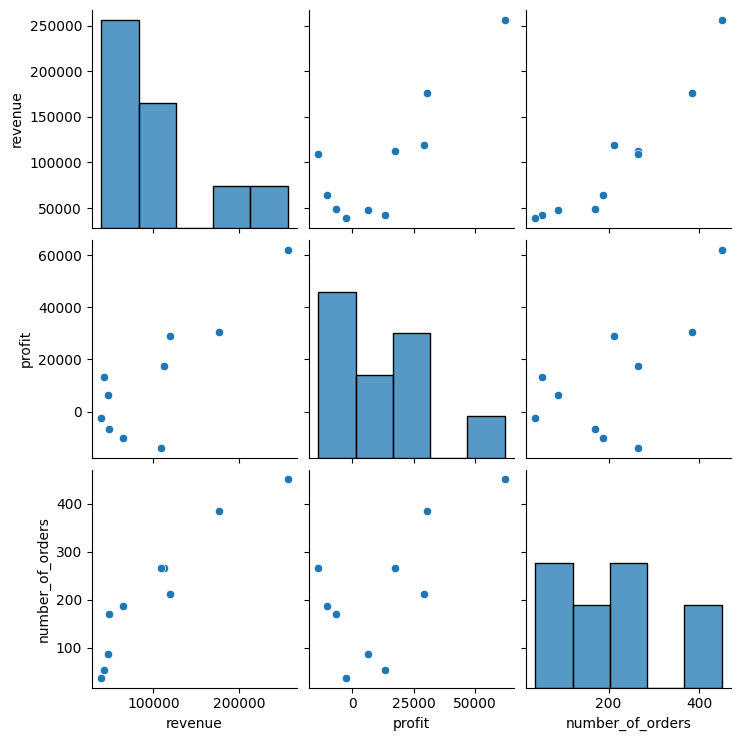

In [36]:
plt.figure(figsize=(10,6))
sns.pairplot(data=result_16)
plt.show()

## Shipping Mode Analysis

In [37]:
query_17 = """SELECT Ship_Mode,
COUNT(DISTINCT Order_ID) AS number_of_orders,
AVG(Quantity) AS average_quantity_per_order,
AVG(julianday(Ship_Date) - julianday(Order_Date)) AS average_shipping_time_days,
AVG(Discount) AS average_discount,
SUM(Sales) AS REVENUE,
SUM(Profit) AS total_profit
FROM superstore_sales
GROUP BY Ship_Mode
ORDER BY number_of_orders DESC
"""
result_17 = pd.read_sql_query(query_17, conn)
result_17

,Ship_Mode,number_of_orders,average_quantity_per_order,average_shipping_time_days,average_discount,REVENUE,total_profit
0,Standard Class,2994,3.820178,5.005195,0.160000,1.357934e+06,164100.8463
1,Second Class,964,3.816452,3.238046,0.138895,4.591936e+05,57446.6354
2,First Class,787,3.701560,2.182705,0.164610,3.514284e+05,48969.8399
3,Same Day,264,3.609576,0.044199,0.152394,1.283631e+05,15891.7589


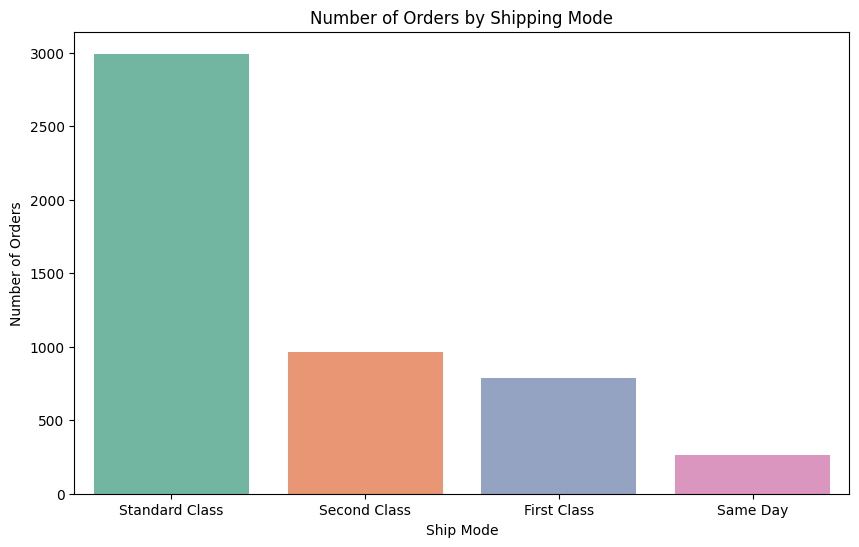

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_17, x='Ship_Mode', y='number_of_orders', palette='Set2')
plt.title('Number of Orders by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Number of Orders')
plt.show()

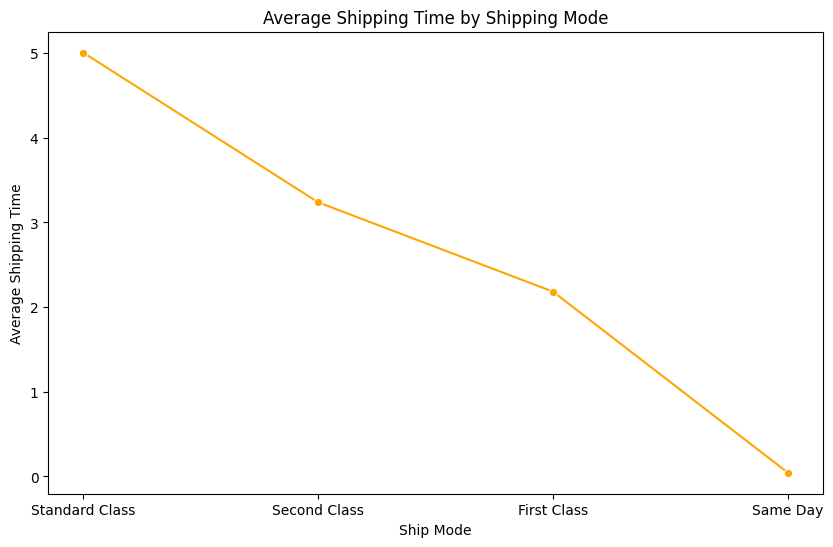

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(data=result_17, x='Ship_Mode', y='average_shipping_time_days', marker='o', color='orange')
plt.title('Average Shipping Time by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Shipping Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

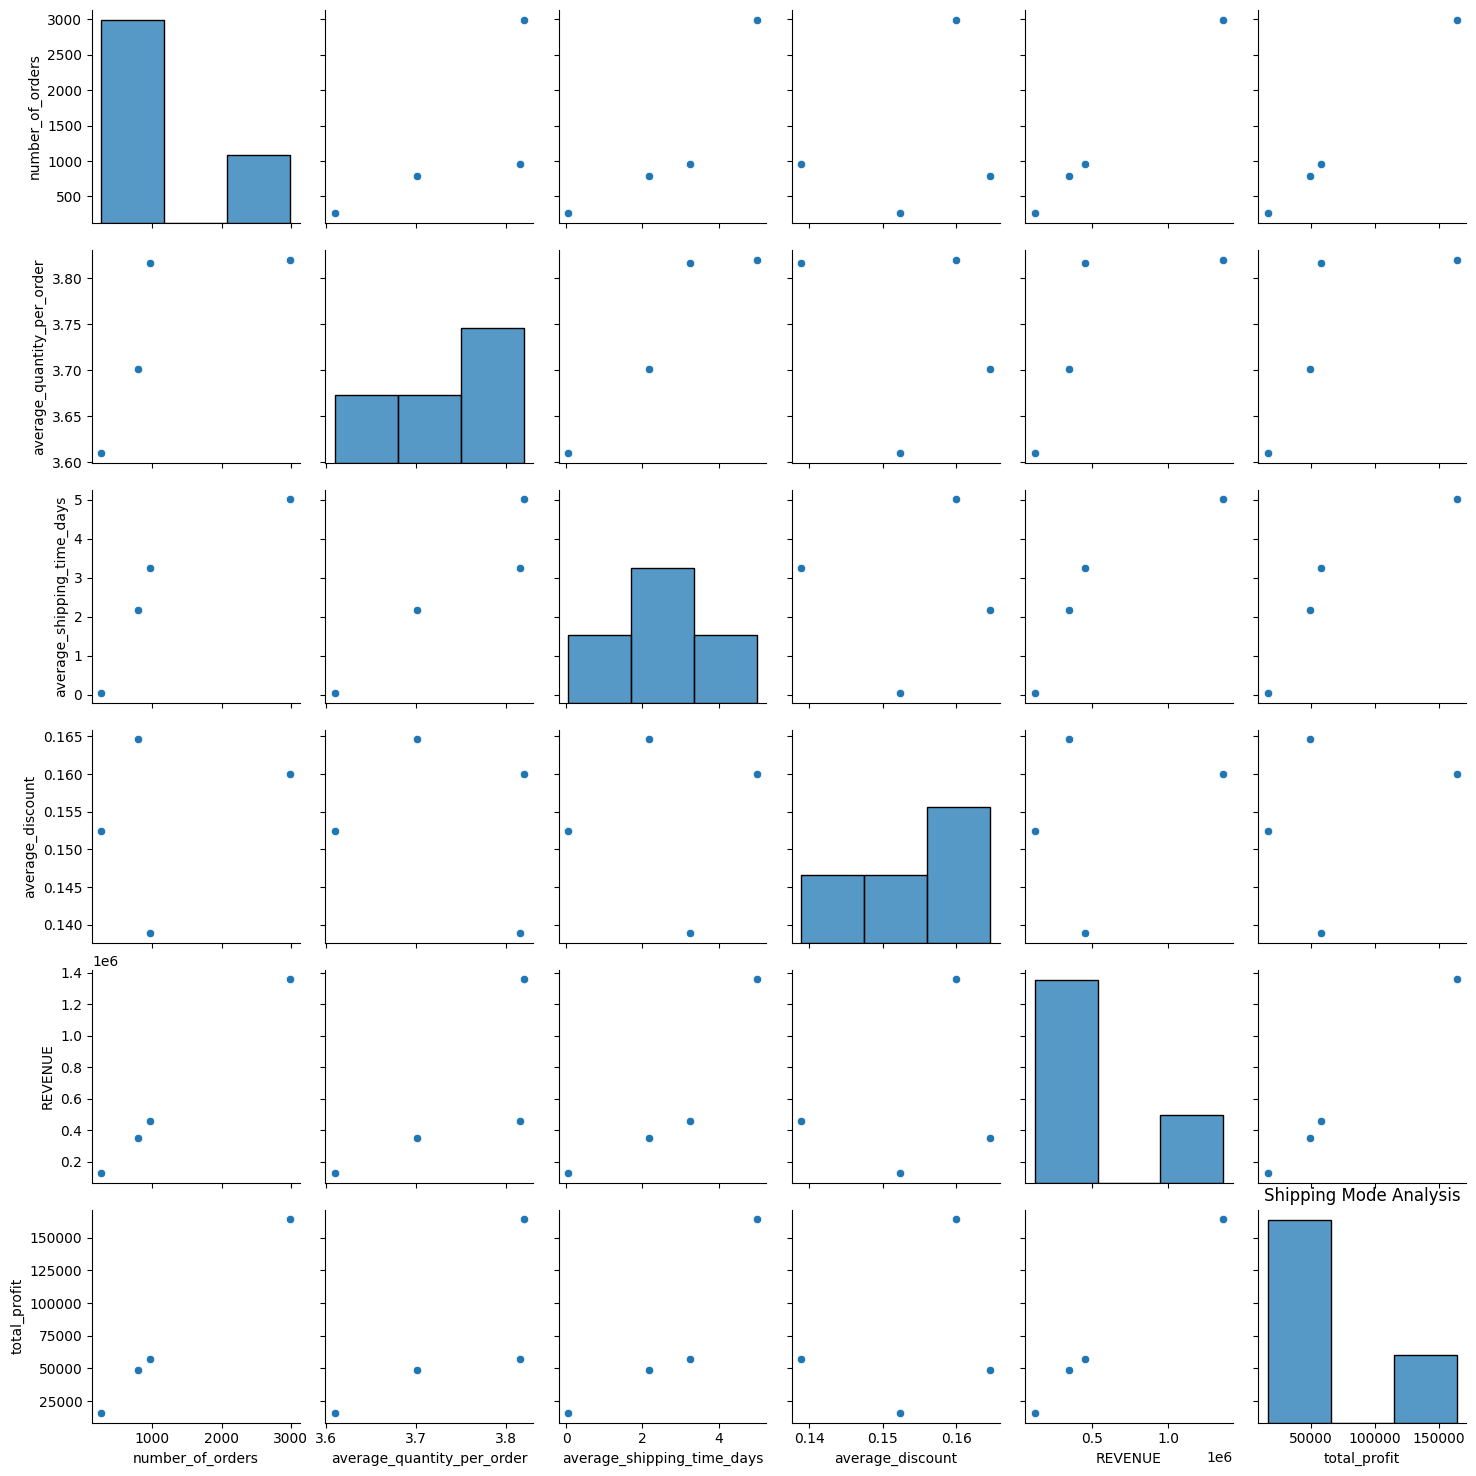

In [40]:
plt.figure(figsize=(12,6))
sns.pairplot(data=result_17)
plt.title('Shipping Mode Analysis')
plt.show()

## Discount Impact Analysis


In [41]:
query_18 = """SELECT
CASE
    WHEN Discount = 0 THEN 'No Discount'
    WHEN Discount > 0 AND Discount <= 0.1 THEN 'Low Discount of 1-10%'
    WHEN Discount > 0.1 AND Discount <= 0.2 THEN 'Medium Discount of 11-20%'
    WHEN Discount > 0.2 AND Discount <= 0.3 THEN 'High Discount of 21%-30%'
    ELSE '30%+ Discount'
END AS Discount_Category,
COUNT(DISTINCT Order_ID) AS number_of_orders,
SUM(Sales) AS total_sales,
SUM(Profit) AS total_profit,
ROUND(SUM(Profit)/SUM(Sales)*100,2) AS profit_margin_percentage,
AVG(Discount) * 100 AS average_discount
FROM superstore_sales
GROUP BY Discount_Category
ORDER BY total_sales DESC;"""
result_18 = pd.read_sql_query(query_18, conn)
result_18

,Discount_Category,number_of_orders,total_sales,total_profit,profit_margin_percentage,average_discount
0,No Discount,2644,1.087908e+06,320987.6032,29.51,0.000000
1,Medium Discount of 11-20%,2436,7.921529e+05,91756.2975,11.58,19.929900
2,30%+ Discount,888,2.595435e+05,-125006.7786,-48.16,63.841338
3,High Discount of 21%-30%,211,1.029453e+05,-10357.2186,-10.06,30.000000
4,Low Discount of 1-10%,89,5.436935e+04,9029.1770,16.61,10.000000


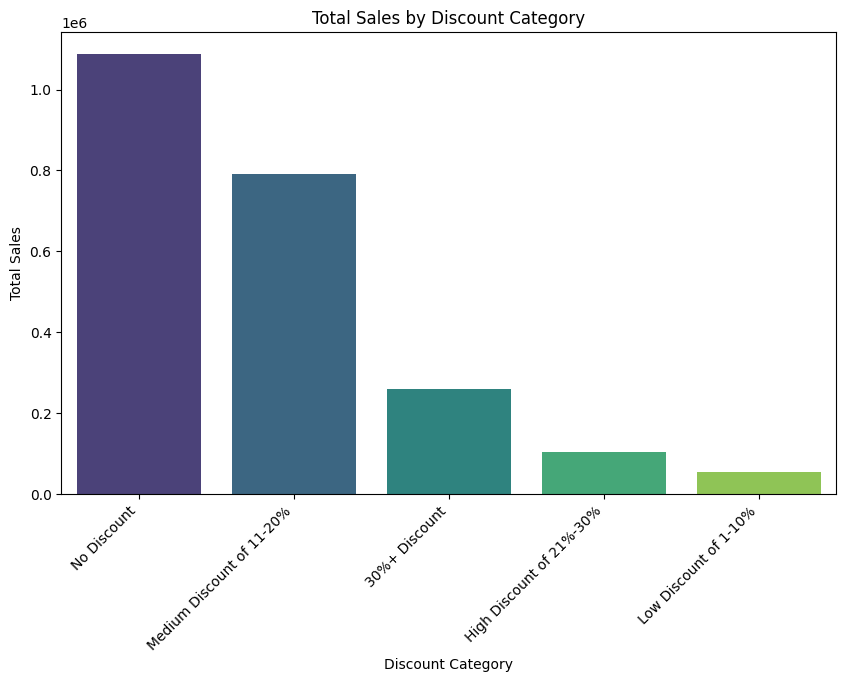

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_18, x='Discount_Category', y='total_sales', palette='viridis')
plt.title('Total Sales by Discount Category')
plt.xlabel('Discount Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.show()

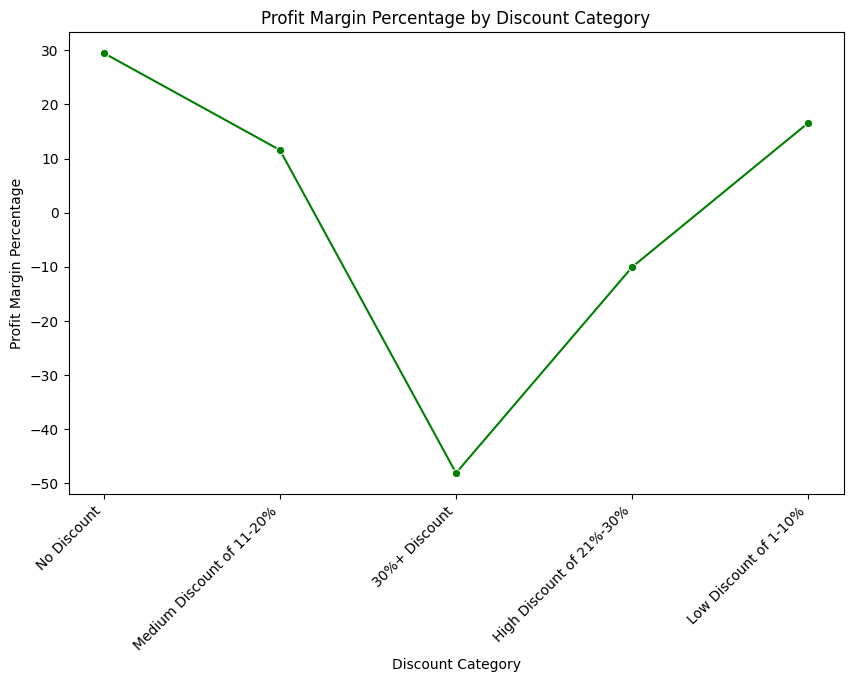

In [43]:
plt.figure(figsize=(10,6))
sns.lineplot(data=result_18, x='Discount_Category', y='profit_margin_percentage', marker='o', color='green')
plt.title('Profit Margin Percentage by Discount Category')
plt.xlabel('Discount Category')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Profit Margin Percentage')
plt.show()

## Top 20 Customers By Revenue

In [44]:
query_19 = query_19 = """WITH CustomerDates AS (
    SELECT 
        Customer_ID, 
        Customer_Name, 
        Segment,
        COUNT(DISTINCT Order_ID) AS number_of_orders,
        SUM(Sales) AS total_revenue,
        SUM(Profit) AS total_profit,
        MIN(Order_Date) AS first_order_date,
        MAX(Order_Date) AS last_order_date
    FROM superstore_sales
    GROUP BY Customer_ID, Customer_Name, Segment
)
SELECT 
    *,
    julianday(last_order_date) - julianday(first_order_date) AS date_difference
FROM CustomerDates
ORDER BY total_revenue DESC"""
result_19 = pd.read_sql_query(query_19, conn)
result_19

,Customer_ID,Customer_Name,Segment,number_of_orders,total_revenue,total_profit,first_order_date,last_order_date,date_difference
0,SM-20320,Sean Miller,Home Office,5,25043.050,-1980.7393,2019-03-18,2022-10-12,1304.0
1,TC-20980,Tamara Chand,Corporate,5,19052.218,8981.3239,2019-11-07,2021-11-26,750.0
2,RB-19360,Raymond Buch,Consumer,6,15117.339,6976.0959,2021-04-01,2022-09-25,542.0
3,TA-21385,Tom Ashbrook,Home Office,4,14595.620,4703.7883,2019-09-12,2022-10-22,1136.0
4,AB-10105,Adrian Barton,Consumer,10,14473.571,5444.8055,2019-12-20,2022-11-19,1065.0
...,...,...,...,...,...,...,...,...,...
788,RS-19870,Roy Skaria,Home Office,2,22.328,9.5838,2021-06-07,2022-12-11,552.0
789,MG-18205,Mitch Gastineau,Corporate,1,16.739,-1.2453,2022-04-10,2022-04-10,0.0
790,CJ-11875,Carl Jackson,Corporate,1,16.520,1.6520,2021-12-30,2021-12-30,0.0
791,LD-16855,Lela Donovan,Corporate,1,5.304,0.4641,2021-06-26,2021-06-26,0.0


<Figure size 1000x600 with 0 Axes>

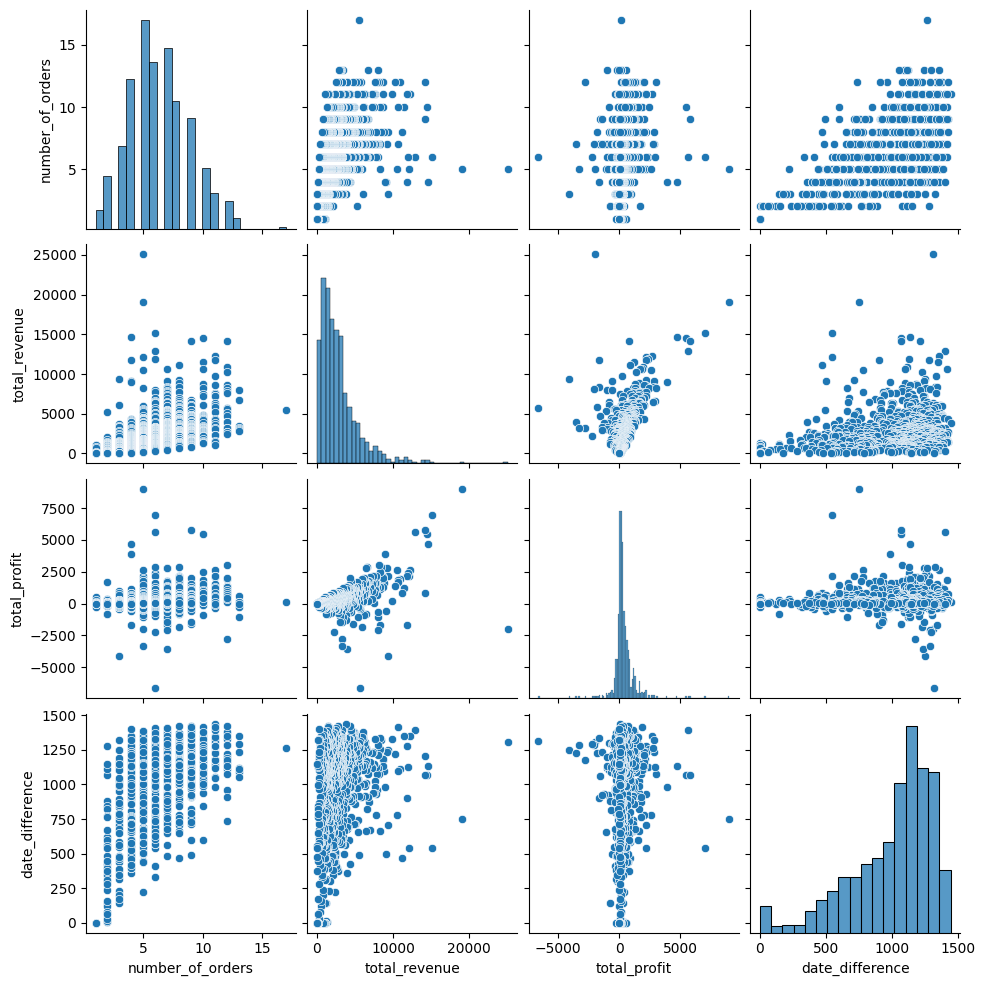

In [45]:
plt.figure(figsize=(10,6))
sns.pairplot(data=result_19)
plt.show()

## Customer Purchase Frequency

In [46]:
query_20 = """WITH Customer_Stats AS (
    SELECT Customer_ID, Customer_Name, Segment,
    COUNT(DISTINCT Order_ID) AS number_of_orders,
    SUM(Sales) AS total_revenue,
    SUM(Profit) AS total_profit
    FROM superstore_sales
    GROUP BY Customer_ID, Customer_Name, Segment
    ) SELECT 
    CASE
        WHEN number_of_orders = 1 THEN 'One-Time Buyer'
        WHEN number_of_orders BETWEEN 2 AND 5 THEN 'Occasional Buyer'
        WHEN number_of_orders BETWEEN 6 AND 15 THEN 'Frequent Buyer'
        ELSE 'Loyal Customer'
    END AS Purchase_Frequency,
    COUNT(Customer_ID) AS number_of_customers,
    SUM(total_revenue) AS revenue,
    SUM(total_profit) AS profit,
    AVG(total_revenue) AS average_revenue_per_customer
    FROM Customer_Stats
    GROUP BY Purchase_Frequency
    ORDER BY revenue DESC;"""
result_20 = pd.read_sql_query(query_20, conn)
result_20

,Purchase_Frequency,number_of_customers,revenue,profit,average_revenue_per_customer
0,Frequent Buyer,463,1.675369e+06,218974.0827,3618.507241
1,Occasional Buyer,317,6.109049e+05,66522.6654,1927.144905
2,Loyal Customer,1,5.478061e+03,144.9578,5478.060800
3,One-Time Buyer,12,5.167640e+03,767.3746,430.636667


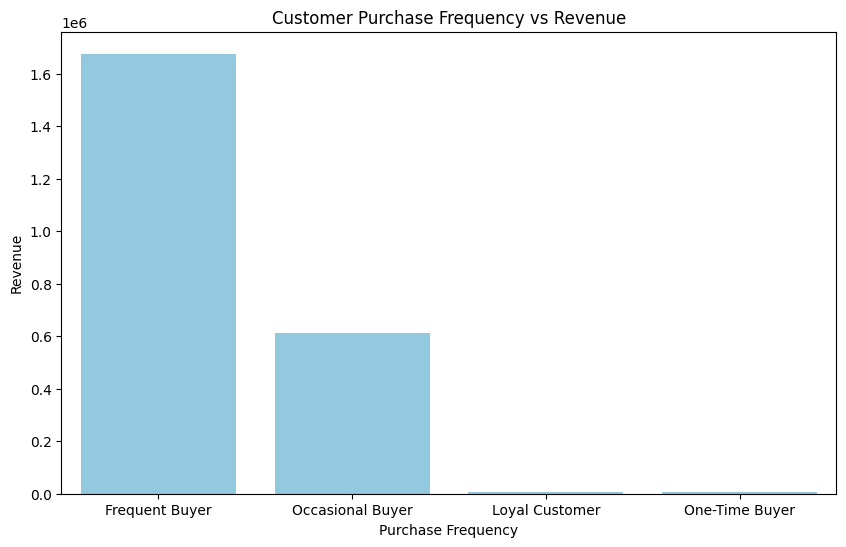

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data=result_20,x='Purchase_Frequency', y='revenue',color='skyblue')
plt.title('Customer Purchase Frequency vs Revenue')
plt.xlabel('Purchase Frequency')
plt.ylabel('Revenue')
plt.show()

## Profit vs Loss Analysis

In [48]:
query_21 = """SELECT Category, Sub_Category,
SUM(CASE WHEN Profit > 0 THEN Profit ELSE 0 END) AS total_profitable_profit,
SUM(CASE WHEN Profit < 0 THEN Profit ELSE 0 END) total_loss,
SUM(Profit) AS net_profit,
COUNT(CASE WHEN Profit > 0 THEN 1 END) AS profitable_orders,
COUNT(CASE WHEN Profit < 0 THEN 1 END) AS loss_orders
FROM superstore_sales
GROUP BY Category, Sub_Category
ORDER BY net_profit ASC"""
result_21 = pd.read_sql_query(query_21, conn)
result_21

,Category,Sub_Category,total_profitable_profit,total_loss,net_profit,profitable_orders,loss_orders
0,Furniture,Tables,14686.6672,-32412.1483,-17725.4811,114,203
1,Furniture,Bookcases,8679.6500,-12152.2060,-3472.5560,117,109
2,Office Supplies,Supplies,1826.5224,-3015.6219,-1189.0995,157,33
3,Office Supplies,Fasteners,982.7134,-33.1952,949.5182,200,12
4,Technology,Machines,33503.4251,-30118.6682,3384.7569,71,44
5,Office Supplies,Labels,5546.2540,0.0000,5546.2540,364,0
6,Office Supplies,Art,6527.7870,0.0000,6527.7870,796,0
7,Office Supplies,Envelopes,6964.1767,0.0000,6964.1767,254,0
8,Furniture,Furnishings,19550.0570,-6490.9134,13059.1436,781,167
9,Office Supplies,Appliances,26767.6466,-8629.6412,18138.0054,399,67


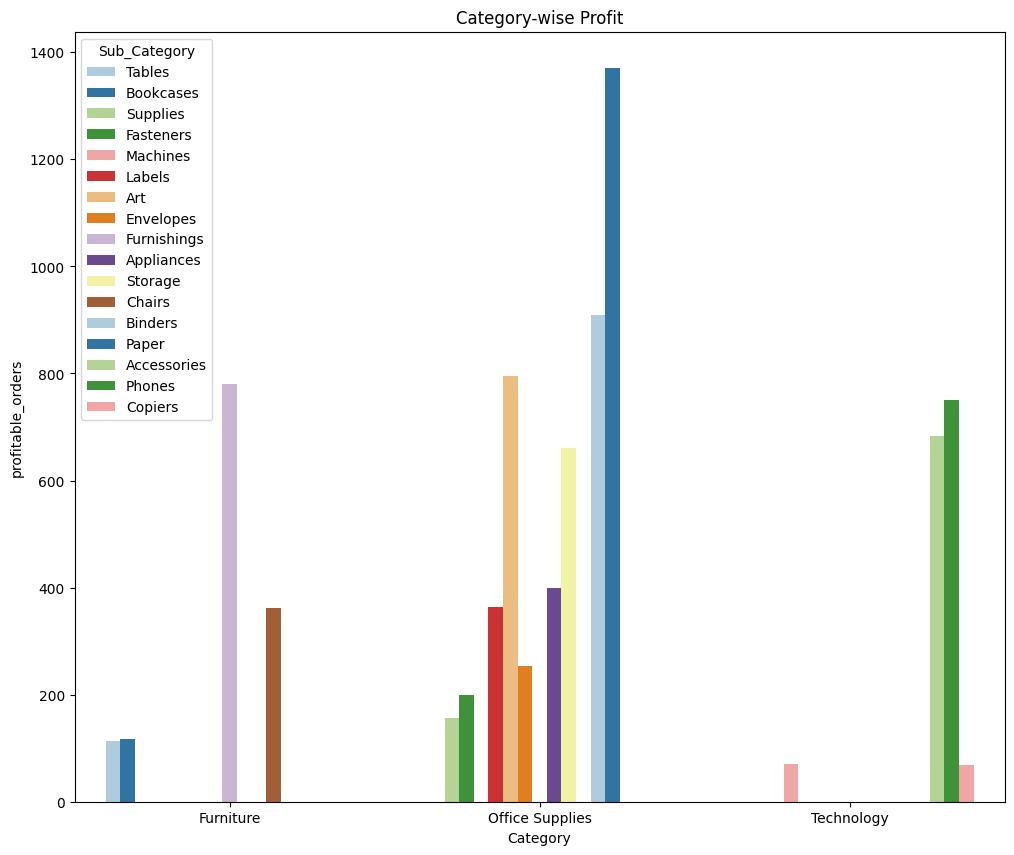

In [49]:
plt.figure(figsize=(12,10))
sns.barplot(data=result_21,x='Category',y='profitable_orders',palette='Paired',hue='Sub_Category')
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel('profitable_orders')
plt.show()

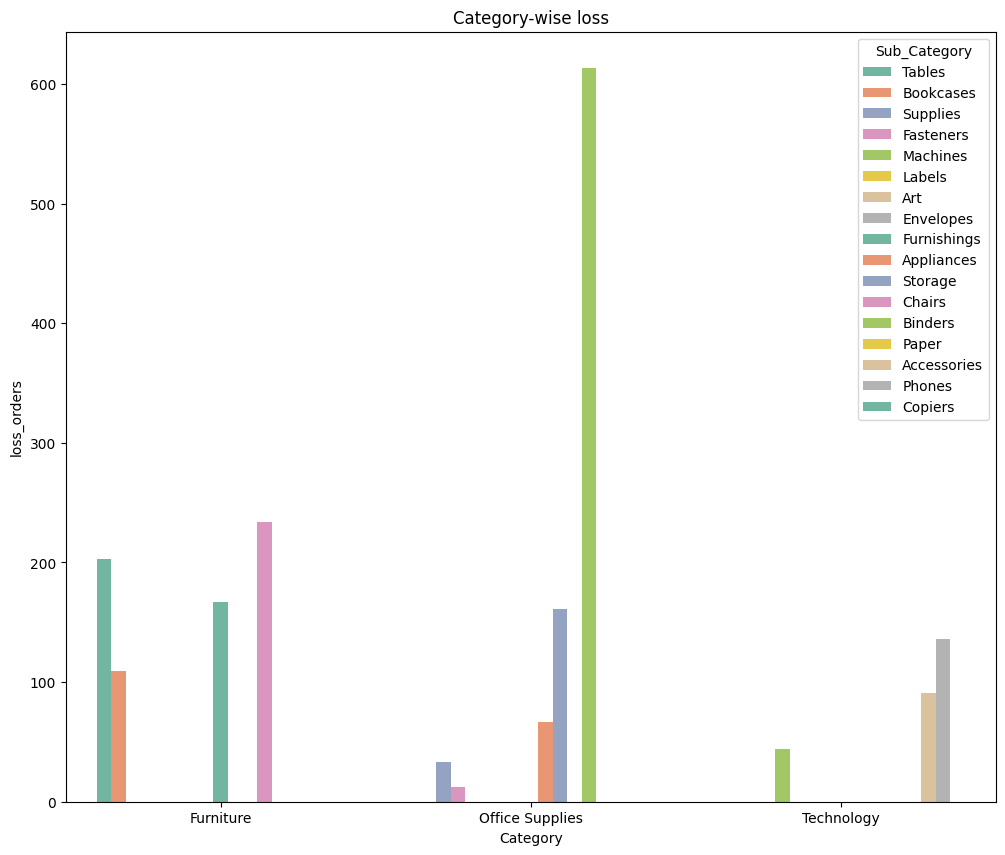

In [50]:
plt.figure(figsize=(12,10))
sns.barplot(data=result_21,x='Category',y='loss_orders',palette='Set2',hue='Sub_Category')
plt.title("Category-wise loss")
plt.xlabel("Category")
plt.ylabel('loss_orders')
plt.show()

## Total Revenue

In [51]:
query_22 = "SELECT SUM(Sales) AS total_sales FROM superstore_sales"
result_22 = pd.read_sql_query(query_22,conn)
print(result_22)

    total_sales
0  2.296919e+06


## Ranking Customers By State And Region

In [ ]:
query_23 = """WITH ranked_customers AS(
    SELECT Customer_Name, State, Region,
    SUM(Sales) AS total_sales,
    DENSE_RANK() OVER(PARTITION BY State ORDER BY SUM(Sales) DESC) AS
    customer_rank FROM superstore_sales GROUP BY Customer_Name, State, Region)
    Select * FROM ranked_customers"""
result_23 = pd.read_sql_query(query_23,conn)
result_23

,Customer_Name,State,Region,total_sales,customer_rank
0,Mark Cousins,Alabama,South,3236.410,1
1,Alan Schoenberger,Alabama,South,2216.800,2
2,Irene Maddox,Alabama,South,1979.890,3
3,Natalie Webber,Alabama,South,1918.790,4
4,Karen Carlisle,Alabama,South,1319.960,5
...,...,...,...,...,...
4058,Anna Gayman,Wisconsin,Central,13.480,49
4059,Muhammed Yedwab,Wisconsin,Central,12.990,50
4060,Sonia Sunley,Wisconsin,Central,10.070,51
4061,Dennis Pardue,Wisconsin,Central,3.600,52
